In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from debiased_spatial_whittle.models.univariate import SquaredExponentialModel
from debiased_spatial_whittle.grids.base import RectangularGrid
from debiased_spatial_whittle.sampling.simulation import SamplerOnRectangularGrid
from debiased_spatial_whittle.inference.periodogram import Periodogram, ExpectedPeriodogram
from debiased_spatial_whittle.inference.likelihood import Estimator, DebiasedWhittle

## Model specification

In [30]:
model = SquaredExponentialModel(rho=10, sigma=0.9)
model

Name,Value,Type,Range
rho,10,ModelParameter,"(0, inf)"
sigma,0.9,ModelParameter,"(0, inf)"


## Grid specification

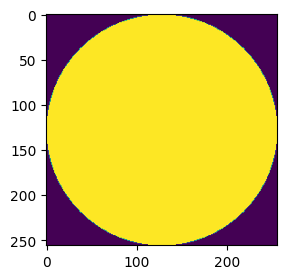

In [7]:
m = 256
shape = (m * 1, m * 1)
x_0, y_0, diameter = m // 2, m // 2, m
x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing="ij")
circle = ((x - x_0) ** 2 + (y - y_0) ** 2) <= 1 / 4 * diameter**2
circle = circle * 1.0
grid_circle = RectangularGrid(shape)
grid_circle.mask = circle

plt.figure(figsize=(3, 3))
plt.imshow(grid_circle.mask);

## Sample generation

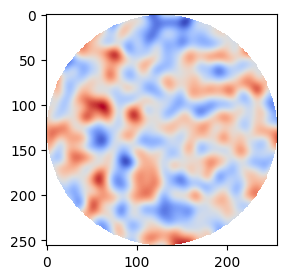

In [27]:
sampler = SamplerOnRectangularGrid(model, grid_circle)
z = sampler()
z_plot = np.where(grid_circle.mask, z, np.nan)

plt.figure(figsize=(3, 3))
plt.imshow(z_plot, cmap="coolwarm");

In [28]:
# ##Inference

In [29]:
from IPython import display


def func(*args, **kargs):
    display.clear_output(wait=True)
    display.display(model_est)


periodogram = Periodogram()
expected_periodogram = ExpectedPeriodogram(grid_circle, periodogram)
debiased_whittle = DebiasedWhittle(periodogram, expected_periodogram)
estimator = Estimator(debiased_whittle, use_gradients=False)

model_est = SquaredExponentialModel(sigma=0.9)
estimate = estimator(model_est, z, opt_callback=func)

Name,Value,Type,Range
rho,9.682205499881674,ModelParameter,"(0, inf)"
sigma,0.9440703554394795,ModelParameter,"(0, inf)"
